## Show some methods to numerically integrate Gaussian, i.e. to show that

$\int^{+\infty}_{-\infty} e^{-x^2} dx = \sqrt{2\pi}$

In [97]:
import ROOT

In [98]:
lowlim, higlim = -10.,10.
f = ROOT.TF1("mygaus","gaus",lowlim,higlim)
f.SetParameters(1.,0.,1.)    

In [99]:
c1 = ROOT.TCanvas()

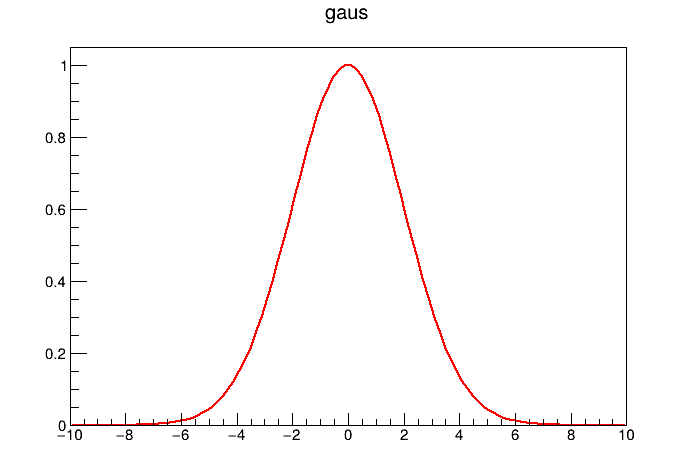

In [100]:
f.SetParameter(2,2.)
f.Draw()
c1.Draw()

In [101]:
f.SetParameter(2,1.)

## 1) Trapez method

In [102]:
def trapez(f, lowlim, higlim, ncalls) :
    if (lowlim > higlim):
        raise Exception('function low limit is larger than high limit')
    integral = 0.
    height = (higlim - lowlim)/ncalls
    for i in range(ncalls-1) :
        one_base = f.Eval(lowlim + i * height)
        other_base = f.Eval(lowlim + (i+1) * height)
        integral += 0.5*(one_base + other_base) * height
    return integral

In [122]:
test1 = trapez(f,lowlim,higlim,25)

In [123]:
true_value = ROOT.TMath.Sqrt(2.*ROOT.TMath.Pi())
print (f'{test1:.30f} estimate of {true_value:.30f}')

2.506628274630798625111083310912 estimate of 2.506628274631000241612355239340


## 2) Hit-and-miss method

In [159]:
## we need to know the function maximum (1 in this case)
tr = ROOT.TRandom3()

def hit_and_miss(f, lowlim, higlim, ncalls, fmax=1.) :
    if (lowlim > higlim):
        raise Exception('function low limit is larger than high limit')
    hit = 0
    for i in range(ncalls) :
        r1,r2 = tr.Uniform(lowlim,higlim), tr.Uniform(0.,fmax)
        if (r2 < f.Eval(r1)) :
            hit += 1
    return (hit / ncalls) * ( higlim - lowlim ) * fmax

In [160]:
test2 = hit_and_miss(f,lowlim,higlim,1_000_000)

In [161]:
print (f'{test2:.30f} estimate of {true_value:.30f}')

2.508280000000000065085714595625 estimate of 2.506628274631000241612355239340


In [127]:
from array import array

In [128]:
ncalls1 = array('f')

In [129]:
ncalls2 = array('f')

In [130]:
delta1, delta2 = array('f'), array('f')

In [131]:
for icall in {5,10,20,30,40,50,100} :
    test = trapez(f,lowlim,higlim,icall)
    delta = test - true_value
    print(f'{icall} calls: {test:.30f} differs from true by {delta}')
    ncalls1.append(icall)
    delta1.append(abs(delta))

100 calls: 2.506628274630999797523145389277 differs from true by -4.440892098500626e-16
5 calls: 1.082682357272780171442150276562 differs from true by -1.42394591735822
40 calls: 2.506628274631001573879984789528 differs from true by 1.3322676295501878e-15
10 calls: 2.542683044378018397679852569127 differs from true by 0.036054769747018156
50 calls: 2.506628274631000685701565089403 differs from true by 4.440892098500626e-16
20 calls: 2.506628288042905605692567405640 differs from true by 1.3411905364080212e-08
30 calls: 2.506628274630999797523145389277 differs from true by -4.440892098500626e-16


In [132]:
for icall in {100,1000,10000,50000,100000,500000,1000000,5000000} :
    test = hit_and_miss(f,lowlim,higlim,icall)
    delta = test - true_value
    print(f'{icall} calls: {test:.30f} differs from true by {delta}')
    ncalls2.append(icall)
    delta2.append(abs(delta))

100000 calls: 2.534399999999999764099811727647 differs from true by 0.027771725368999522
500000 calls: 2.497360000000000024300561562995 differs from true by -0.009268274631000217
1000000 calls: 2.499519999999999964046537570539 differs from true by -0.0071082746310002776
5000000 calls: 2.505220000000000446505055151647 differs from true by -0.001408274630999795
100 calls: 2.800000000000000266453525910038 differs from true by 0.293371725369
1000 calls: 2.220000000000000195399252334028 differs from true by -0.28662827463100005
10000 calls: 2.520000000000000017763568394003 differs from true by 0.013371725368999776
50000 calls: 2.479200000000000070343730840250 differs from true by -0.02742827463100017


In [133]:
c1 = ROOT.TCanvas()

In [134]:
ncalls1.append(100000000); delta1.append(-0.001)
g1 = ROOT.TGraph(len(ncalls1),ncalls1,delta1)

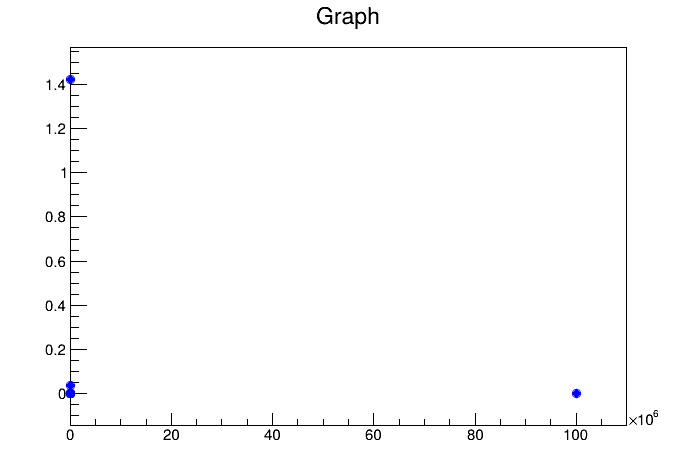

In [135]:
g1.SetMarkerStyle(20); g1.SetMarkerColor(ROOT.kBlue); g1.Draw("AP"); c1.Draw()

In [136]:
ROOT.gPad.SetLogx()

In [137]:
ROOT.gPad.SetLogy()

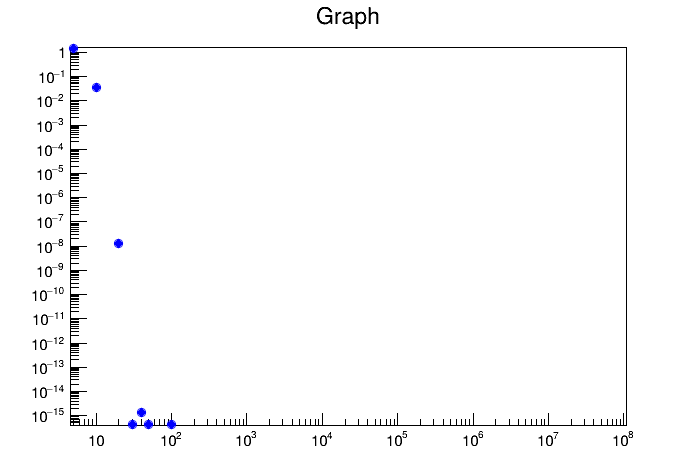

In [138]:
c1.Draw()

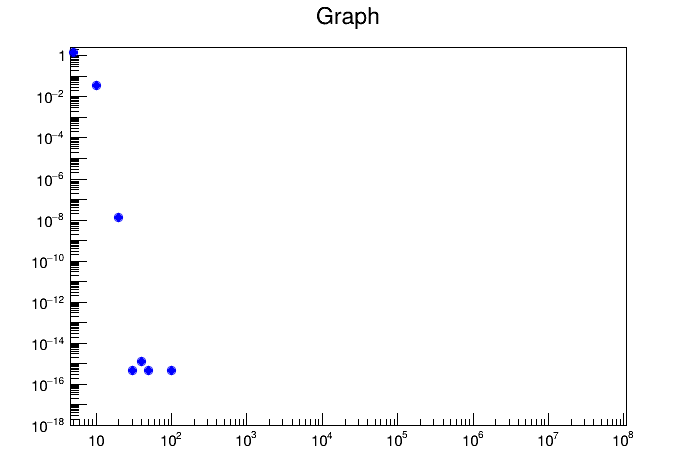

In [140]:
g1.SetMinimum(1E-18); g1.SetMaximum(2.5)

g1.Draw("AP"); c1.Draw()

In [ ]:
g2 = ROOT.TGraph(len(ncalls2),ncalls2,delta2)

g2.SetMarkerStyle(21); g2.SetMarkerColor(ROOT.kRed); g2.Draw("Psame"); c1.Draw()

In [143]:
g1.SetTitle("Algorithm convergence")
g1.GetXaxis().SetTitle("Number of calls")
g1.GetYaxis().SetTitle("#Delta integral")

In [144]:
c1.Update()

In [149]:
l = ROOT.TLegend(0.6,0.2,0.8,0.3)

In [150]:
l.AddEntry(g1,"Trapezoid"); l.AddEntry(g2,"Hit and miss")

In [151]:
l.Draw("same")

In [152]:
c1.Update()

In [164]:
## we need to know the function maximum (1 in this case) and the monotony (crescent for x < 0, decrescent for x > 0)

def hit_and_miss_trapez(f, lowlim, higlim, ncalls, nbins) :  # notice TWO call parameters now
    if (lowlim > higlim):
        raise Exception('function low limit is larger than high limit')
    integral = 0.
    height = (higlim - lowlim)/nbins
    for i in range(nbins-1) :                 # divide in trapezes and apply hit-and-miss inside each
        binlim_sx = lowlim + i * height;   binlim_dx = lowlim + (i+1) * height
        if (binlim_sx >= 0) :
            fmax = f.Eval(binlim_sx) 
        else :
            fmax = f.Eval(binlim_dx)
        integral += hit_and_miss(f,binlim_sx,binlim_dx,ncalls // nbins,fmax)
    return integral

In [165]:
ncalls3 = array('f'); delta3 = array('f')

In [166]:
for icall in {100,1000,10000,50000,100000,500000,1000000,5000000} :
    test = hit_and_miss_trapez(f,lowlim,higlim,icall,20)
    delta = test - true_value
    print(f'{icall} calls: {test:.30f} differs from true by {delta}')
    ncalls3.append(icall)
    delta3.append(abs(delta))

100000 calls: 2.516080981483120648789508777554 differs from true by 0.009452706852120407
500000 calls: 2.501521623307351394061015525949 differs from true by -0.0051066513236488476
1000000 calls: 2.508592631523497207268746933551 differs from true by 0.0019643568924969657
5000000 calls: 2.504466724444640135516237933189 differs from true by -0.002161550186360106
100 calls: 2.852078049407211324250965844840 differs from true by 0.3454497747762111
1000 calls: 2.481590735535500691355537128402 differs from true by -0.02503753909549955
10000 calls: 2.505674292645023282233296413324 differs from true by -0.0009539819859769594
50000 calls: 2.500566347992797311405865912093 differs from true by -0.00606192663820293


In [167]:
g3 = ROOT.TGraph(len(ncalls3),ncalls3,delta3)

g3.SetMarkerStyle(22); g3.SetMarkerColor(ROOT.kGreen); g3.Draw("Psame"); c1.Update()

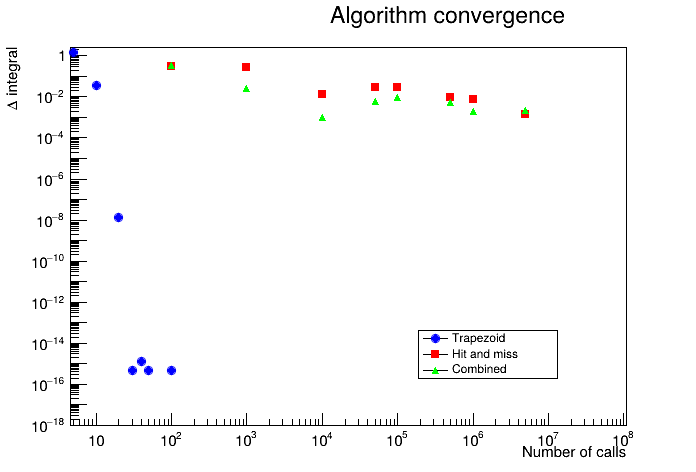

In [168]:
c1.Draw()

In [169]:
l.AddEntry(g3,"Combined")

In [170]:
l.Draw("same")

In [171]:
c1.Update()